# Import packages

In [13]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
 
# STATSMODELS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import zscore
 
# SKLEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.evaluate import bias_variance_decomp 

## Import Dataset

In [14]:
#file_path = 'C:/Users/Admin/Documents/MVC/Cursos/PG Applied AI & ML/03. Supervised ML/Group_Assignment/case_8_games_training.csv'
file_path = 'case_8_games_training.csv'
#file_path = "/Users/goncalogago/Desktop/POS_G_AI_ML/Trabalho_Supervised_learning/case_8_games_training.csv"
training_data = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [15]:
# Checks the dimensions of the dataset
training_data.shape

(220923, 55)

In [16]:
# Verify first 5 observations
training_data.head()

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,...,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,original,dummy
0,10,661.0,74.0,12656037,368822.0,9.99,01/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66949.0,1490.0,01/09/2016,0
1,10,690.0,71.0,12617378,363721.0,9.99,02/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,66989.0,1489.0,02/09/2016,0
2,10,681.0,74.0,12570654,358609.0,9.99,03/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67033.0,1491.0,03/09/2016,0
3,10,656.0,72.0,12507511,356800.0,9.99,04/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67087.0,1493.0,04/09/2016,0
4,10,588.0,71.0,12524101,360397.0,9.99,05/09/2006,1,0,0,...,0,0,0,1,88.0,97.0,67137.0,1495.0,05/09/2016,0


In [17]:
# Verify unique values in variables
qtde_columns = len(training_data.columns)
valores_unicos = []
for i in training_data.columns[0:qtde_columns].tolist():
    print(i, ':', len(training_data[i].astype(str).value_counts()))
    valores_unicos.append(len(training_data[i].astype(str).value_counts()))  

app_id : 7726
average : 2479
mediantime : 2625
owners : 57040
players : 10722
price : 212
date : 30
action : 2
adventure : 2
anime : 2
casual : 2
earlyaccess : 2
freetoplay : 2
indie : 2
multiplayer : 2
openworld : 2
singleplayer : 2
sports : 2
strategy : 2
zombies : 2
kgames : 2
activision : 2
bethesdasoftworks : 2
electronicarts : 2
rockstargames : 2
sega : 2
squareenix : 2
thqnordic : 2
telltalegames : 2
valve : 2
warnerbros : 2
bioware : 2
capcom : 2
cdprojektred : 2
dice : 2
firaxisgames : 2
gearboxsoftware : 2
iointeractive : 2
lucasarts : 2
mumbojumbo : 2
obsidianentertainment : 2
relicentertainment : 2
squareenixdev : 2
telltalegamesdev : 2
thecreativeassembly : 2
treyarch : 2
tripwireinteractive : 2
ubisoftdev : 2
valvedev : 2
metascore : 67
userscore : 100
positive : 10909
negative : 4241
original : 31
dummy : 1


In [18]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220923 entries, 0 to 220922
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   app_id                 220923 non-null  int64  
 1   average                134839 non-null  float64
 2   mediantime             134839 non-null  float64
 3   owners                 220923 non-null  int64  
 4   players                134839 non-null  float64
 5   price                  188148 non-null  float64
 6   date                   220923 non-null  object 
 7   action                 220923 non-null  int64  
 8   adventure              220923 non-null  int64  
 9   anime                  220923 non-null  int64  
 10  casual                 220923 non-null  int64  
 11  earlyaccess            220923 non-null  int64  
 12  freetoplay             220923 non-null  int64  
 13  indie                  220923 non-null  int64  
 14  multiplayer            220923 non-nu

In [19]:
training_data.describe()

,app_id,average,mediantime,owners,players,price,action,adventure,anime,casual,...,thecreativeassembly,treyarch,tripwireinteractive,ubisoftdev,valvedev,metascore,userscore,positive,negative,dummy
count,220923.000000,134839.000000,134839.000000,2.209230e+05,1.348390e+05,188148.000000,220923.000000,220923.000000,220923.000000,220923.000000,...,220923.000000,220923.000000,220923.000000,220923.000000,220923.000000,42236.000000,195179.000000,1.951790e+05,195179.000000,220923.0
mean,299663.635769,200.269017,183.275247,2.249986e+05,1.310701e+04,10.371443,0.407907,0.315132,0.048166,0.251613,...,0.000136,0.001086,0.000272,0.003531,0.002852,72.734255,73.117651,1.483184e+03,257.044759,0.0
std,141529.582621,481.524754,550.143061,1.520186e+06,2.030210e+05,9.453715,0.491447,0.464570,0.214118,0.433941,...,0.011652,0.032942,0.016478,0.059314,0.053325,10.920140,19.983056,1.933221e+04,1969.491754,0.0
min,10.000000,1.000000,1.000000,4.650000e+02,4.650000e+02,0.190000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000e+00,0.000000,0.0
25%,239090.000000,30.000000,26.000000,3.861000e+03,5.330000e+02,4.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,62.000000,1.900000e+01,6.000000,0.0
50%,332800.000000,103.000000,80.000000,1.788900e+04,1.018000e+03,8.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,77.000000,6.900000e+01,24.000000,0.0
75%,401810.000000,211.000000,176.000000,9.652500e+04,2.806000e+03,12.990000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,89.000000,3.290000e+02,98.000000,0.0
max,511380.000000,19979.000000,20082.000000,8.308348e+07,1.135156e+07,300.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,100.000000,1.340212e+06,108025.000000,0.0


FIRST DATA SET CLEANING ( SUM MISSING VALUES AND ONES FROM AVERAGE AND EXCLUDES ABOVE A (CERTAIN TRESHGOLD MISSING+1'S )/ TOTAL )

tHE RATIONALE IS TO UNDERSTAND IF TO MAKE SOME TRAINING DATASETS, AT LEAST A MORE RESTRICT A NORE LOOSE TO TEST IF WE CAN HAVE A BETTER PERFORMANCE

In [20]:

df = pd.read_csv(file_path)
df_dropped = df.drop(columns=df.columns[np.r_[7:49, -1]])
print(f"Shape of DataFrame after dropping columns: {df_dropped.shape}")


def count_missing_values_per_row(df):
    return df.isna().sum(axis=1)

missing_values_count = count_missing_values_per_row(df_dropped)
print("Missing values per row:")
print(missing_values_count)
threshold = 5


df_dropped_2 = df_dropped[missing_values_count <= threshold].copy()

Shape of DataFrame after dropping columns: (220923, 12)
Missing values per row:
0         0
1         0
2         0
3         0
4         0
         ..
220918    1
220919    1
220920    1
220921    4
220922    4
Length: 220923, dtype: int64


In [21]:
observations_id_count= training_data.groupby('app_id').size().reset_index(name='count')
unique_average_values = training_data.groupby(['app_id', 'average']).size().reset_index(name='count')
print(unique_average_values)
print(observations_id_count)

        app_id  average  count
0           10    588.0      1
1           10    590.0      1
2           10    592.0      1
3           10    603.0      1
4           10    615.0      2
...        ...      ...    ...
101372  511370     22.0      2
101373  511370     29.0      1
101374  511370     40.0      1
101375  511380      1.0      3
101376  511380     40.0      3

[101377 rows x 3 columns]
      app_id  count
0         10     30
1         30     30
2         40     30
3         50     30
4         60     30
...      ...    ...
7721  511250      3
7722  511330     30
7723  511340     30
7724  511370     22
7725  511380     10

[7726 rows x 2 columns]


In [22]:
#PRELIMINARY ANALYSIS
#CHECKS UNIQUE VALUES , MISSING + "=1" , and the percentage of total Missing + "=1" 
# The values that are allways the same or follow a direct rule or that dont have much variance we can populated them but for that we need to have an ideia 

def summarize_nan(df, indexer, count_column ):
    #CATEGORIES TO FILTER
    def categorize_values(x):  
        if pd.isna(x) or x == 1:
            return 'Missing or 1'
        else:
            return 'Other'
    
    #GROUP BY
    unique_values = df.groupby(indexer)[count_column].apply(lambda x: x.apply(categorize_values).value_counts()).reset_index()
    #PIVOT
    unique_values = unique_values.pivot(index=indexer, columns='level_1', values=count_column).fillna(0).astype(int).reset_index()

    #GROUP BY
    unique_values_column = df.groupby(indexer)[count_column].apply(lambda x: x.nunique(dropna=False)).reset_index(name='unique_values')
    #PIVOT
    unique_values = pd.merge(unique_values, unique_values_column, on='app_id')

    #ADD COLUMNS
    unique_values['Total'] = unique_values['Missing or 1'] + unique_values['Other']
    unique_values['ratio_unique_total'] = unique_values["unique_values"] / unique_values['Total']
    unique_values['percentage'] = unique_values['Missing or 1'] / unique_values['Total']
    
    return unique_values

unique_average = summarize_nan(df,'app_id','average')
unique_mediantime = summarize_nan(df,'app_id','mediantime')
unique_players = summarize_nan(df,'app_id','players')
unique_prices = summarize_nan(df,'app_id','price')
unique_metascore = summarize_nan(df,'app_id','metascore')
unique_userscore = summarize_nan(df,'app_id','userscore')
unique_negative = summarize_nan(df,'app_id','negative')
unique_positive = summarize_nan(df,'app_id','positive')

#RESUME
print( ' ---  average --- ')
print((unique_average['percentage'] > 0.9).sum())
print(unique_average)
print( ' ---  MRDIANTIME --- ')
print((unique_mediantime['percentage'] > 0.9).sum())
print(unique_mediantime)
print( ' ---  PLAYERS --- ')
print((unique_players['percentage'] > 0.9).sum())
print(unique_players)
print( ' ---  PRICE --- ')
print((unique_prices['percentage'] > 0.9).sum())
print(unique_prices)
print( ' ---  METASCORE --- ')
print((unique_metascore['percentage'] > 0.9).sum())
print(unique_metascore)
print( ' ---  USERSCORE --- ')
print((unique_userscore['percentage'] > 0.9).sum())
print(unique_userscore)
print( ' ---  NEGATIVE --- ')
print((unique_negative['percentage'] > 0.9).sum())
print(unique_negative)
print( ' ---  POSITIVE --- ')
print((unique_positive['percentage'] > 0.9).sum())
print(unique_positive)

 ---  average --- 
1291
      app_id  Missing or 1  Other  unique_values  Total  ratio_unique_total  \
0         10             0     30             22     30            0.733333   
1         30             0     30             30     30            1.000000   
2         40             0     30             28     30            0.933333   
3         50             0     30             30     30            1.000000   
4         60             0     30             26     30            0.866667   
...      ...           ...    ...            ...    ...                 ...   
7721  511250             3      0              1      3            0.333333   
7722  511330            12     18             11     30            0.366667   
7723  511340             0     30             24     30            0.800000   
7724  511370            11     11              8     22            0.363636   
7725  511380             7      3              3     10            0.300000   

      percentage  
0       

In [23]:
#FFILL & BFILL 
# PRICE | METASCORE

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df.sort_values(by=['app_id', 'date'])
columns_to_fill = ['price', 'metascore']

df[columns_to_fill] = df.groupby('app_id')[columns_to_fill].fillna(method='ffill').fillna(method='bfill')




C:\Users\miguel_joao\AppData\Local\Temp\ipykernel_8736\1126730509.py:8: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df[columns_to_fill] = df.groupby('app_id')[columns_to_fill].fillna(method='ffill').fillna(method='bfill')
C:\Users\miguel_joao\AppData\Local\Temp\ipykernel_8736\1126730509.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_to_fill] = df.groupby('app_id')[columns_to_fill].fillna(method='ffill').fillna(method='bfill')


average        86084
mediantime     86084
players        86084
price          32775
metascore     178687
userscore      25744
positive       25744
negative       25744
original       25744
dtype: int64


<AxesSubplot:>

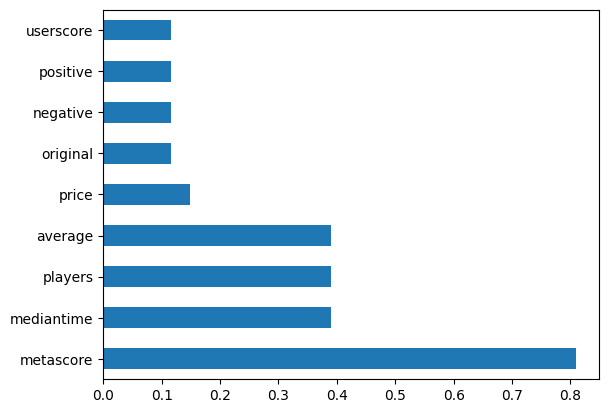

In [24]:
#Check missing values
missing_values = training_data.isna().sum()
missing_valuesnot0 = missing_values[missing_values > 0]
print(missing_valuesnot0)

# Checks the percentage of missing values ​​in each variable
missing_vales_order = training_data.isna().sum().sort_values(ascending = False)
missing_percentages=missing_vales_order/len(training_data)
missing_percentages[missing_percentages!=0]

# Print null values
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [25]:
# Transform objects fields in DateTime
training_data['date'] = pd.to_datetime(training_data['date'], format='%d/%m/%Y', errors='coerce')
training_data['original'] = pd.to_datetime(training_data['original'], format='%d/%m/%Y', errors='coerce')

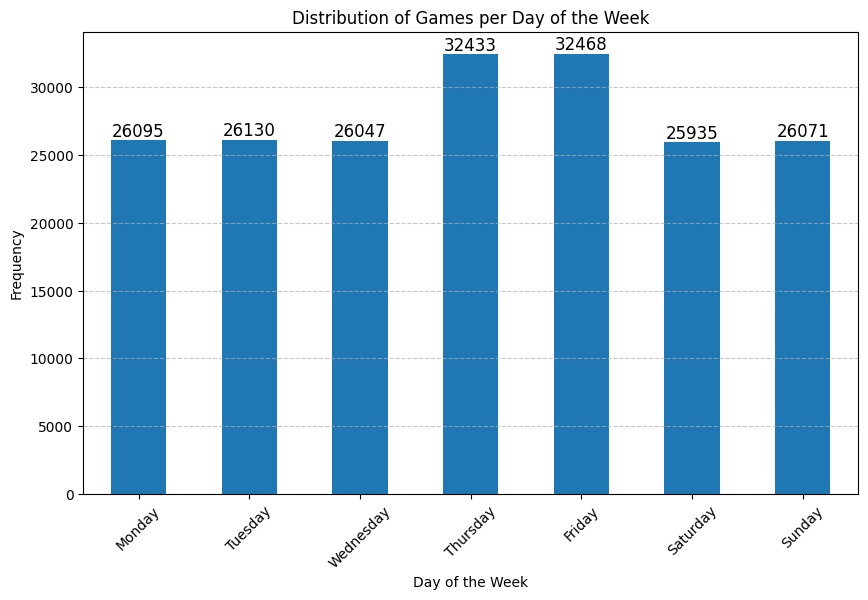

In [26]:
#Distribution of Games per Day of the Week 
training_data.dropna(subset=['original'], inplace=True)

training_data['day_of_week'] = training_data['original'].dt.day_name()

day_counts = training_data['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

plt.figure(figsize=(10, 6))
bars = day_counts.plot(kind='bar')
for bar in bars.patches:# Add text annotations on top of each bar
    bars.annotate(f'{bar.get_height()}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Distribution of Games per Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

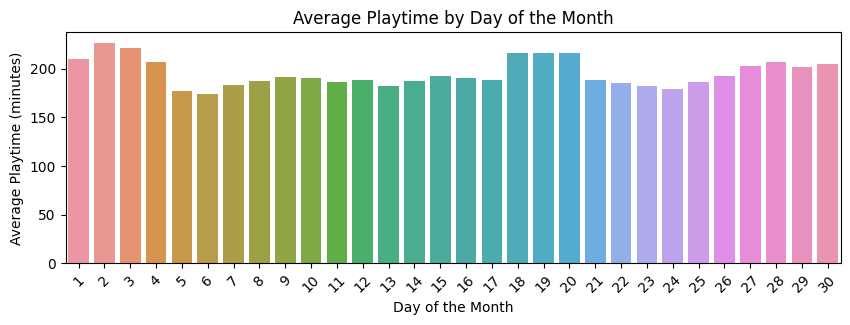

In [27]:
# The objective is to predict the average playtime per day

training_data['day_of_month'] = training_data['date'].dt.day

# Agrupar por dia do mês e calcular a média dos minutos de jogo
average_time_per_day = training_data.groupby('day_of_month')['average'].mean()  # Use .median() para mediana

# Plotar os dados
plt.figure(figsize=(10, 3))
sns.barplot(x=average_time_per_day.index, y=average_time_per_day.values)
plt.title('Average Playtime by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Playtime (minutes)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

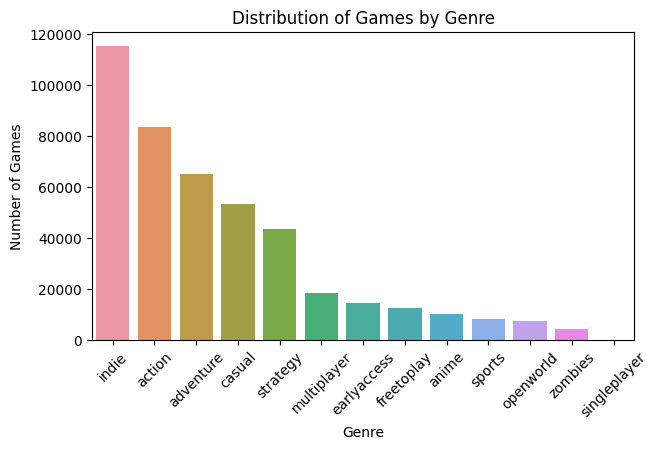

In [28]:
# Genre and Publisher Distribution
genre_columns = ['action', 'adventure', 'anime', 'casual', 'earlyaccess', 'freetoplay', 'indie', 'multiplayer', 'openworld', 'singleplayer', 'sports', 'strategy', 'zombies']

# Count of games by genre
genre_distribution = training_data[genre_columns].sum().sort_values(ascending=False)

# Plotting Genre Distribution
plt.figure(figsize=(7, 4))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values)
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

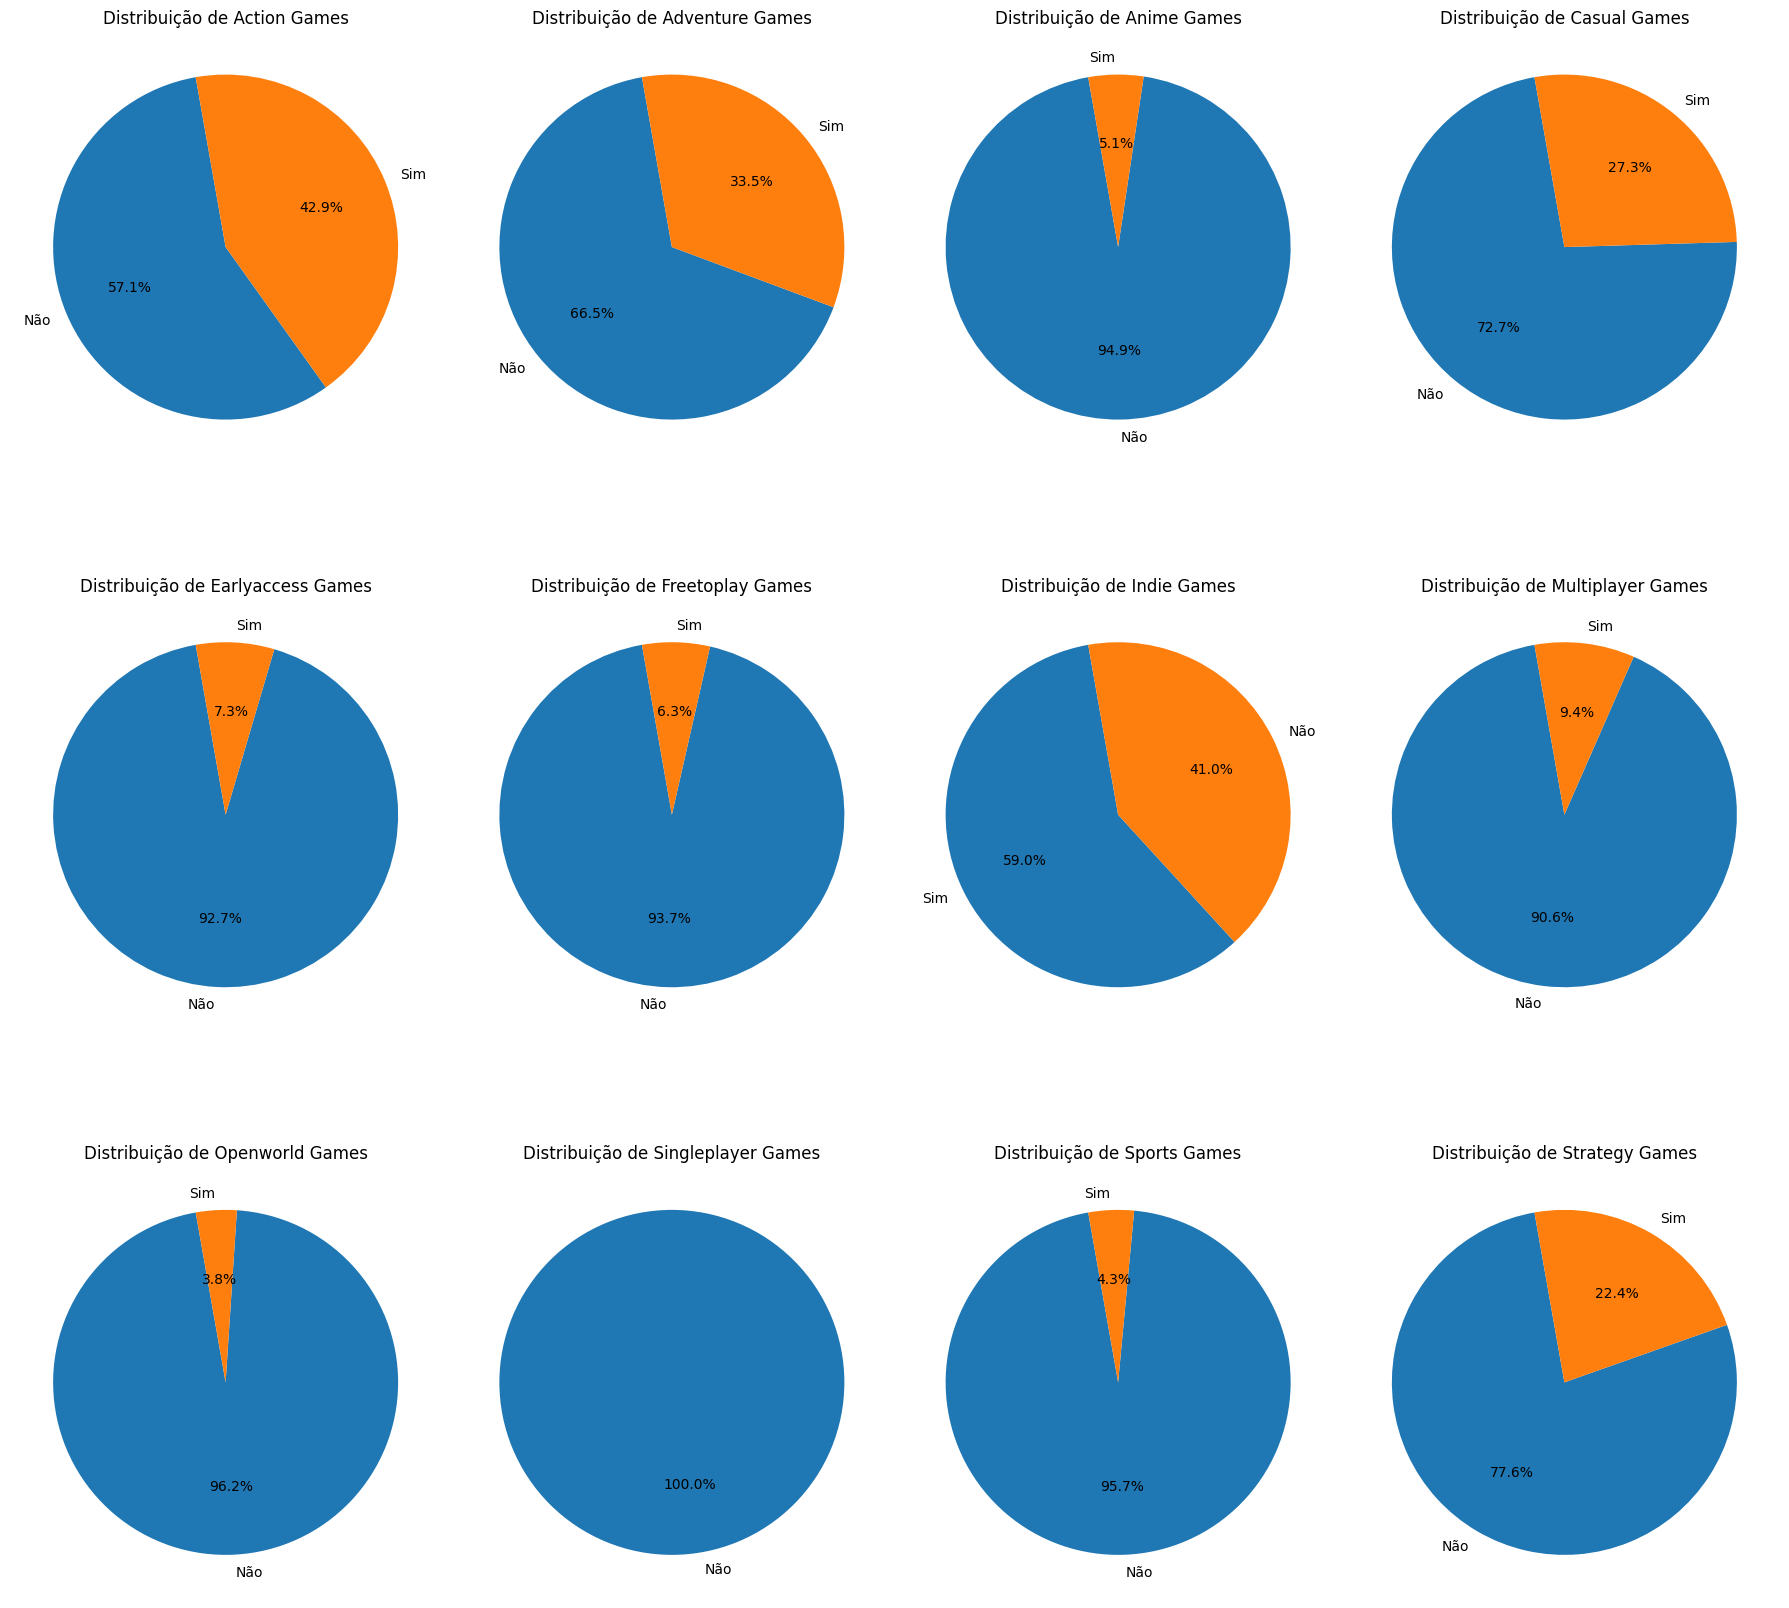

In [36]:
# Substituir 1 por 'Sim' e 0 por 'Não' nas variáveis categóricas binárias
training_data[genre_columns] = training_data[genre_columns].copy({1: 'Sim', 0: 'Não'})

# Criar os gráficos de pizza para as variáveis categóricas binárias (0 ou 1) após a substituição
fig, axes = plt.subplots(3, 4, figsize=(18, 18))

for var, ax in zip(genre_columns, axes.flatten()):
    counts = training_data[var].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%0.1f%%', startangle=100)
    ax.set_title(f'Distribuição de {var.capitalize()} Games')

plt.tight_layout()
plt.show()

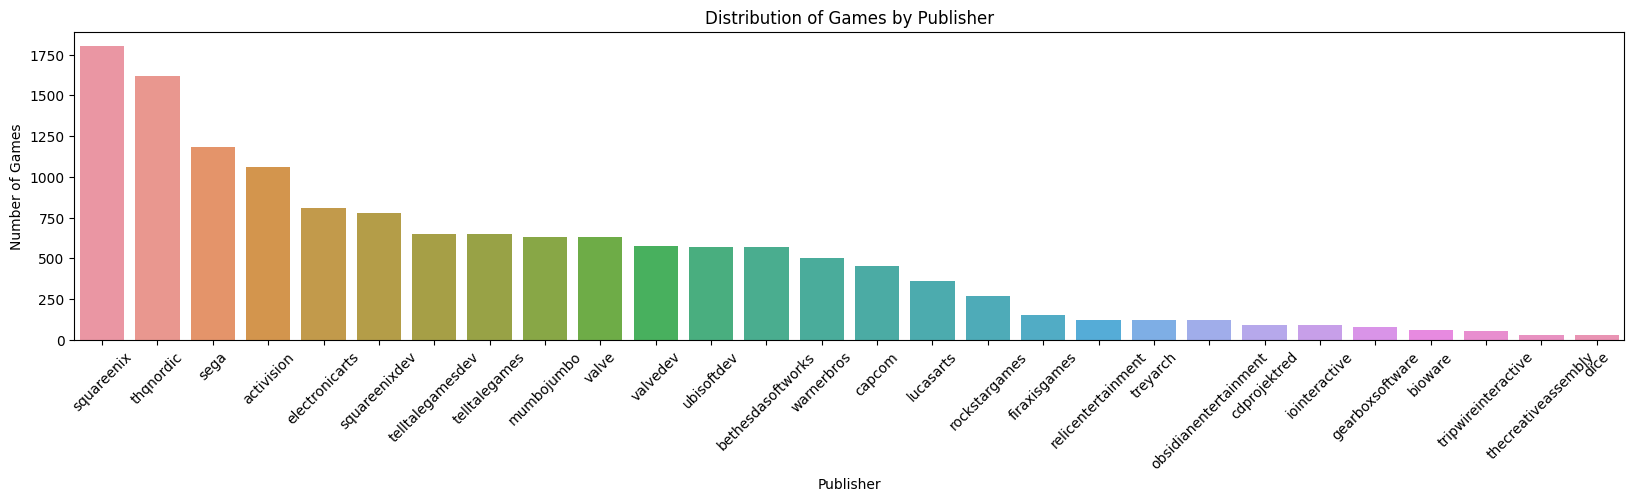

squareenix          1800
thqnordic           1617
sega                1183
activision          1062
electronicarts       810
squareenixdev        780
telltalegamesdev     646
telltalegames        646
mumbojumbo           628
valve                628
dtype: int64


In [37]:
# Plotting Publisher Distribution
publisher_columns = ['activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 'valvedev']

# Count of games by publisher
publisher_distribution = training_data[publisher_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 4))
sns.barplot(x=publisher_distribution.index, y=publisher_distribution.values)
plt.title('Distribution of Games by Publisher')
plt.xticks(rotation=45)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()

# Top 10 publishers
top_10_publishers = publisher_distribution.nlargest(10)
print(top_10_publishers)

OptionError: No such keys(s): 'mode.use_inf_as_null'

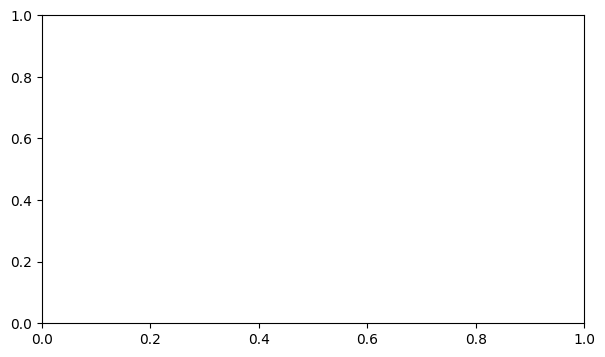

In [38]:
# Number of Games Released Over Days
training_data['day'] = training_data['original'].dt.day
games_per_day = training_data['day'].value_counts().sort_index()

plt.figure(figsize=(7, 4))
sns.lineplot(x=games_per_day.index, y=games_per_day.values, marker='o')
plt.title('Number of Games Released Over Days')
plt.xlabel('Day')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

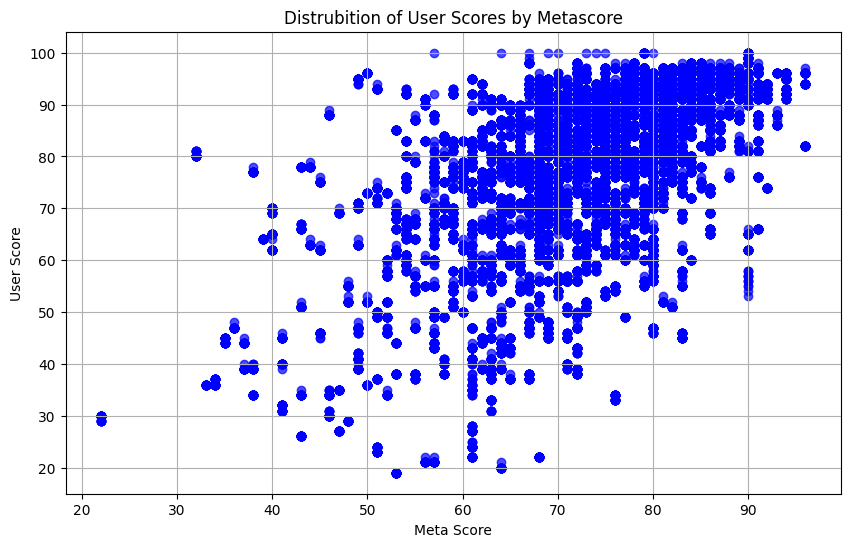

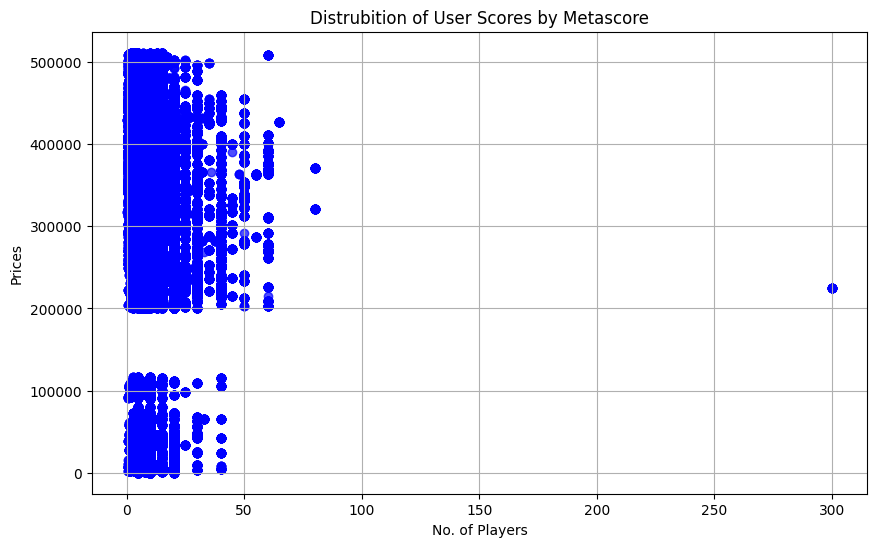

In [39]:
#Distrubition of User Scores by Metascore
plt.figure(figsize=(10, 6))
plt.scatter(training_data['metascore'], training_data['userscore'], alpha=0.7, c='b')
plt.xlabel('Meta Score')
plt.ylabel('User Score')
plt.title('Distrubition of User Scores by Metascore')
plt.grid(True)
plt.show()

#Distrubition of Players by Price
plt.figure(figsize=(10, 6))
plt.scatter(training_data['price'], training_data['app_id'], alpha=0.7, c='b')
plt.xlabel('No. of Players')
plt.ylabel('Prices')
plt.title('Distrubition of User Scores by Metascore')
plt.grid(True)
plt.show()


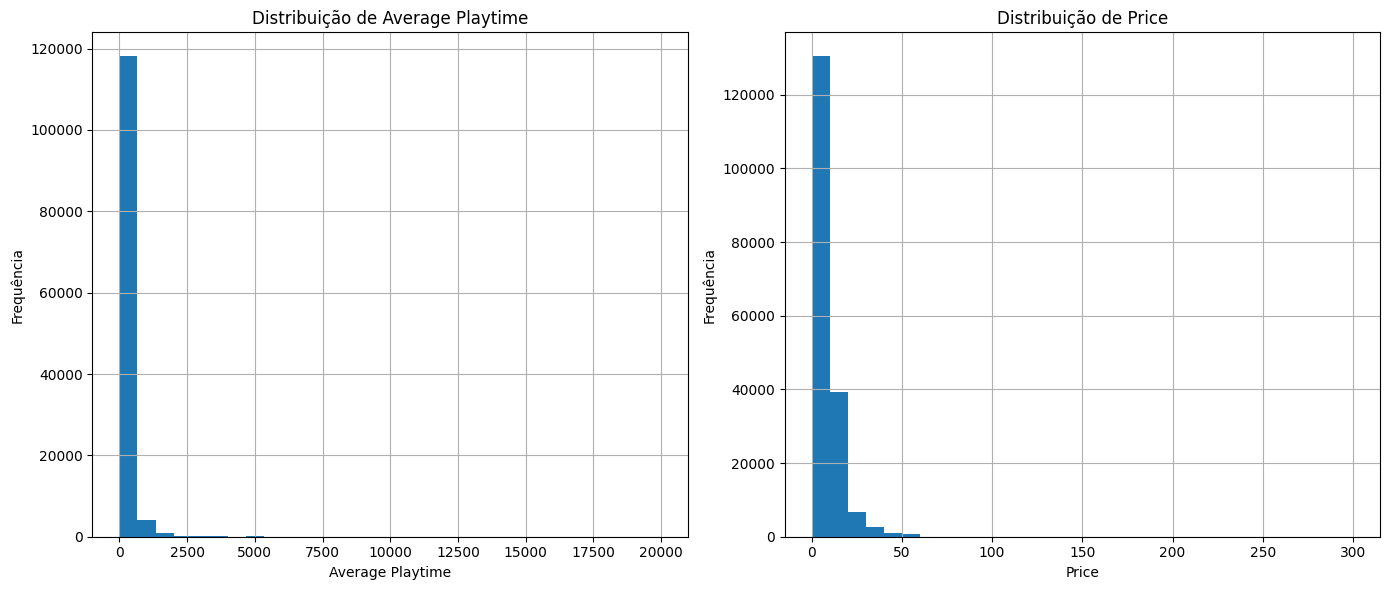

In [40]:
# Exemplo de histograma para variáveis numéricas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

training_data['average'].hist(bins=30, ax=axes[0])
axes[0].set_title('Distribuição de Average Playtime')
axes[0].set_xlabel('Average Playtime')
axes[0].set_ylabel('Frequência')

training_data['price'].hist(bins=30, ax=axes[1])
axes[1].set_title('Distribuição de Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

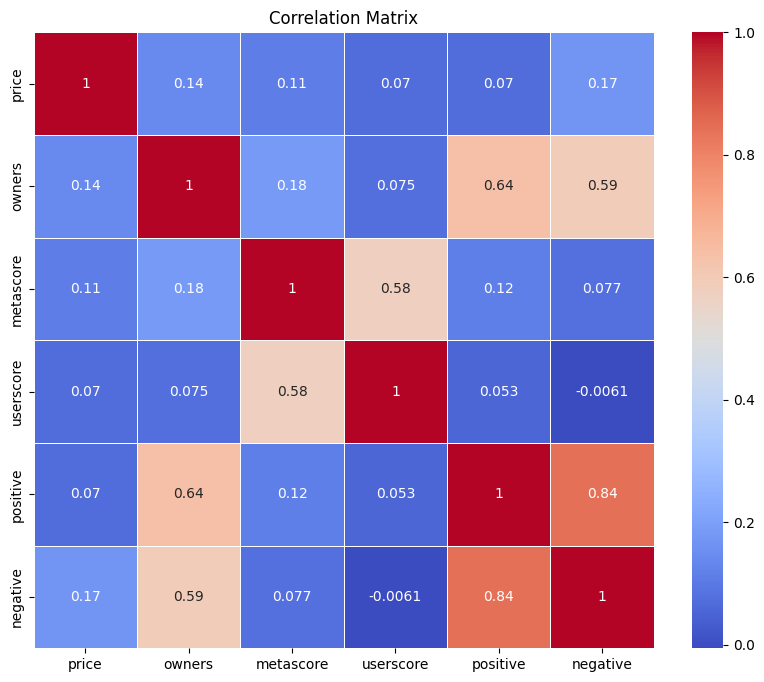

In [41]:
# Correlation Analysis
correlation_matrix = training_data[['price', 'owners', 'metascore', 'userscore', 'positive', 'negative']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Select covariates
training_data[genre_columns] = training_data[genre_columns].replace({'Sim': 1, 'Não':0})
independent_vars = ['mediantime','owners', 'players', 'price', 'metascore', 'userscore', 'positive', 'negative', 'original', 'earlyaccess', 'freetoplay', 'multiplayer', 'openworld', 'action', 'adventure', 'anime', 'casual', 'indie', 'sports', 'strategy', 'zombies', 'activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 
                       'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 
                       'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 
                       'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 
                       'valvedev']
average_corr = training_data[independent_vars].corrwith(training_data['average'])

print('Zero-order correlation with dependent variable:')

display(average_corr)


C:\Users\miguel_joao\AppData\Local\Temp\ipykernel_8736\2641120463.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data[genre_columns] = training_data[genre_columns].replace({'Sim': 1, 'Não':0})


Zero-order correlation with dependent variable:


mediantime               0.916364
owners                   0.069794
players                  0.062505
price                    0.141682
metascore                0.076228
userscore               -0.001353
positive                 0.054488
negative                 0.068261
original                -0.001552
earlyaccess             -0.011137
freetoplay               0.044982
multiplayer              0.018731
openworld                0.045665
action                  -0.078103
adventure               -0.036149
anime                    0.014086
casual                  -0.031613
indie                   -0.094188
sports                   0.022639
strategy                 0.094214
zombies                  0.009674
activision               0.000613
bethesdasoftworks        0.014328
electronicarts           0.005761
rockstargames            0.010186
sega                     0.024258
squareenix               0.011806
thqnordic                0.004962
telltalegames            0.004582
valve         

## Data Cleaning and Transformation

Outliers

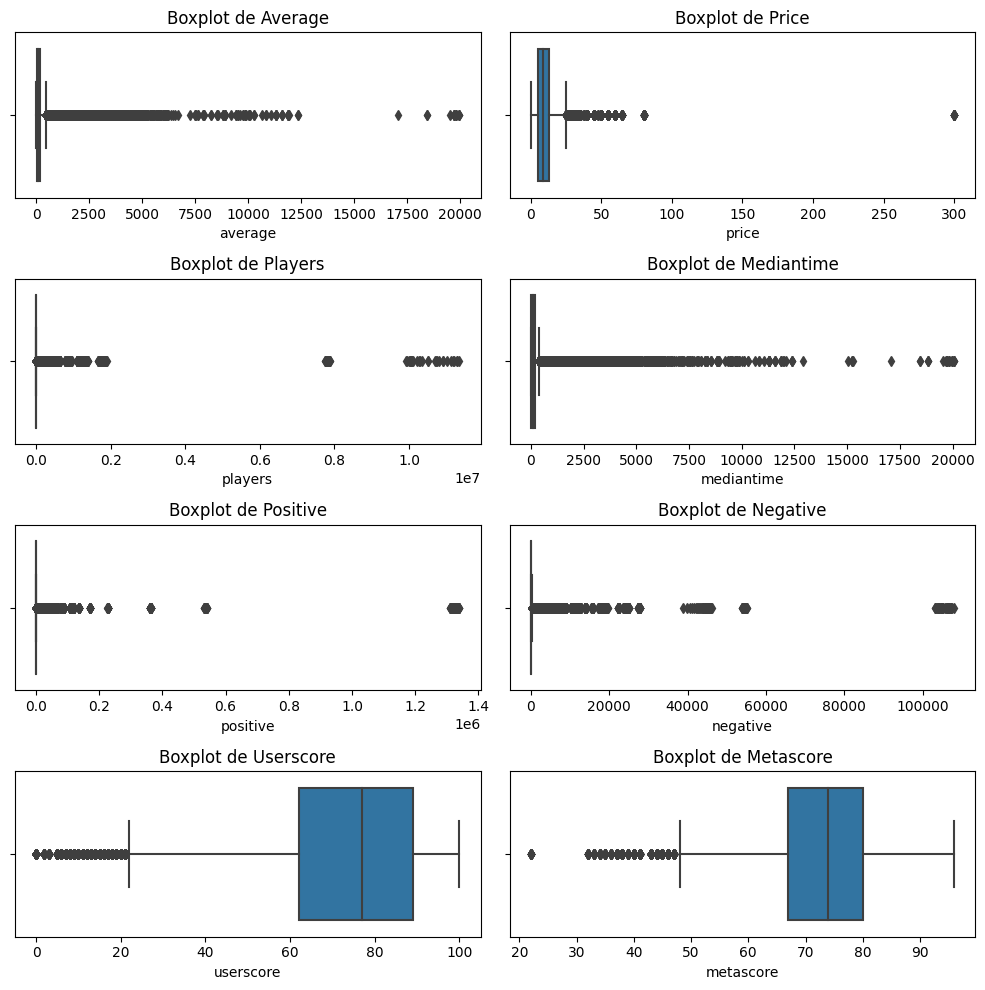

In [44]:
#Outliers
numeric_columns = ['average', 'price', 'players', 'mediantime', 'positive','negative', 'userscore', 'metascore']
 
# Criar boxplots para visualizar outliers
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()
 
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=training_data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col.capitalize()}')
 
plt.tight_layout()
plt.show()

Missing Values - Replaced by median

In [45]:
#Check missing values
missing_values = training_data.isna().sum()
missing_valuesnot0 = missing_values[missing_values > 0]
print(missing_valuesnot0)

# Fill missing values for 'price', 'metascore', 'userscore', 'positive', 'negative' with the median of their columns
#training_data['price'].fillna(training_data['price'].median(), inplace=True)
#training_data['metascore'].fillna(training_data['metascore'].median(), inplace=True)
#training_data['userscore'].fillna(training_data['userscore'].median(), inplace=True)
#training_data['positive'].fillna(training_data['positive'].median(), inplace=True)
#training_data['negative'].fillna(training_data['negative'].median(), inplace=True)

average        71325
mediantime     71325
players        71325
price          14219
metascore     154792
dtype: int64


In [46]:
missing_average_by_app_id = training_data.groupby('app_id')['average'].apply(lambda x: x.isnull().mean())
 
app_ids_to_drop = missing_average_by_app_id[missing_average_by_app_id > 0.80].index
 
 
training_data_cleaned = training_data[~training_data['app_id'].isin(app_ids_to_drop)]
training_data_cleaned

,app_id,average,mediantime,owners,players,price,date,action,adventure,anime,...,valvedev,metascore,userscore,positive,negative,original,dummy,day_of_week,day_of_month,day
0,10,661.0,74.0,12656037,368822.0,9.99,2006-09-01,1,0,0,...,1,88.0,97.0,66949.0,1490.0,2016-09-01,0,Thursday,1,1
1,10,690.0,71.0,12617378,363721.0,9.99,2006-09-02,1,0,0,...,1,88.0,97.0,66989.0,1489.0,2016-09-02,0,Friday,2,2
2,10,681.0,74.0,12570654,358609.0,9.99,2006-09-03,1,0,0,...,1,88.0,97.0,67033.0,1491.0,2016-09-03,0,Saturday,3,3
3,10,656.0,72.0,12507511,356800.0,9.99,2006-09-04,1,0,0,...,1,88.0,97.0,67087.0,1493.0,2016-09-04,0,Sunday,4,4
4,10,588.0,71.0,12524101,360397.0,9.99,2006-09-05,1,0,0,...,1,88.0,97.0,67137.0,1495.0,2016-09-05,0,Monday,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220918,511380,1.0,1.0,500,505.0,2.99,2006-09-15,0,0,0,...,0,NaN,100.0,9.0,0.0,2016-09-15,0,Thursday,15,15
220919,511380,1.0,1.0,505,505.0,2.99,2006-09-16,0,0,0,...,0,NaN,100.0,9.0,0.0,2016-09-16,0,Friday,16,16
220920,511380,1.0,1.0,506,506.0,2.99,2006-09-17,0,0,0,...,0,NaN,100.0,9.0,0.0,2016-09-17,0,Saturday,17,17
220921,511380,NaN,NaN,519,NaN,2.99,2006-09-29,0,0,0,...,0,NaN,100.0,9.0,0.0,2016-09-29,0,Thursday,29,29


In [47]:
# Remove unnecessary variables
training_data = training_data.drop("dummy", axis=1)


## Model selection and training

In [48]:

# Select the independent variables
independent_vars = ['price', 'players', 'mediantime', 'positive', 'negative', 'userscore', 'metascore']
 
# Create a new DataFrame with only the independent variables
X = training_data[independent_vars]
 
# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Create a new DataFrame with the scaled independent variables
X_scaled_df = pd.DataFrame(X_scaled, columns=independent_vars)
 
# Scale the dependent variable
y = training_data["average"]
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
 
# Convert the scaled y back to a 1D array
y_scaled = y_scaled.flatten()
 
# Check for NaNs and Infs in the independent variables
X_scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
X_scaled_df.dropna(inplace=True)
 
# Align y_scaled with X_scaled_df
y_scaled = y_scaled[X_scaled_df.index]
 
# Add constant after handling NaNs and Infs
X_scaled_df = sm.add_constant(X_scaled_df)
 
# Fit the OLS model
model = sm.OLS(y_scaled, X_scaled_df)
linear_results = model.fit()
print(linear_results.summary())
 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:35:56   Log-Likelihood:                -11872.
No. Observations:               34661   AIC:                         2.376e+04
Df Residuals:                   34653   BIC:                         2.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.002     -4.105      0.0

In [49]:

# create a Ridge regression model
alpha = 0.1
ridge_results = model.fit_regularized(L1_wt=0, alpha=alpha, start_params=linear_results.params) # L1wt=0 for Ridge and L1wt=1 for Lasso
ridge_final = sm.regression.linear_model.OLSResults(model,
                                              ridge_results.params,
                                              model.normalized_cov_params)
# get the model summary
print(ridge_final.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.604e+04
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:36:03   Log-Likelihood:                -13095.
No. Observations:               34661   AIC:                         2.621e+04
Df Residuals:                   34653   BIC:                         2.627e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0133      0.002     -5.424      0.0

In [53]:

results = []
for n in np.arange(0, 1.0, 0.05).tolist():
    ridge_results = model.fit_regularized(L1_wt=0, alpha=n, start_params=linear_results.params)
 
    ridge_results_fit = sm.regression.linear_model.OLSResults(model,
                                                           ridge_results.params,
                                                           model.normalized_cov_params)
    results.append(np.append(ridge_results.params, ridge_results_fit.mse_resid))
 
alpha_values_df = pd.DataFrame(results, columns=["const"] + independent_vars + ['mse_resid'])
alpha_values_df.index=np.arange(0, 1.0, 0.05).tolist()
alpha_values_df.index.name = 'alpha'


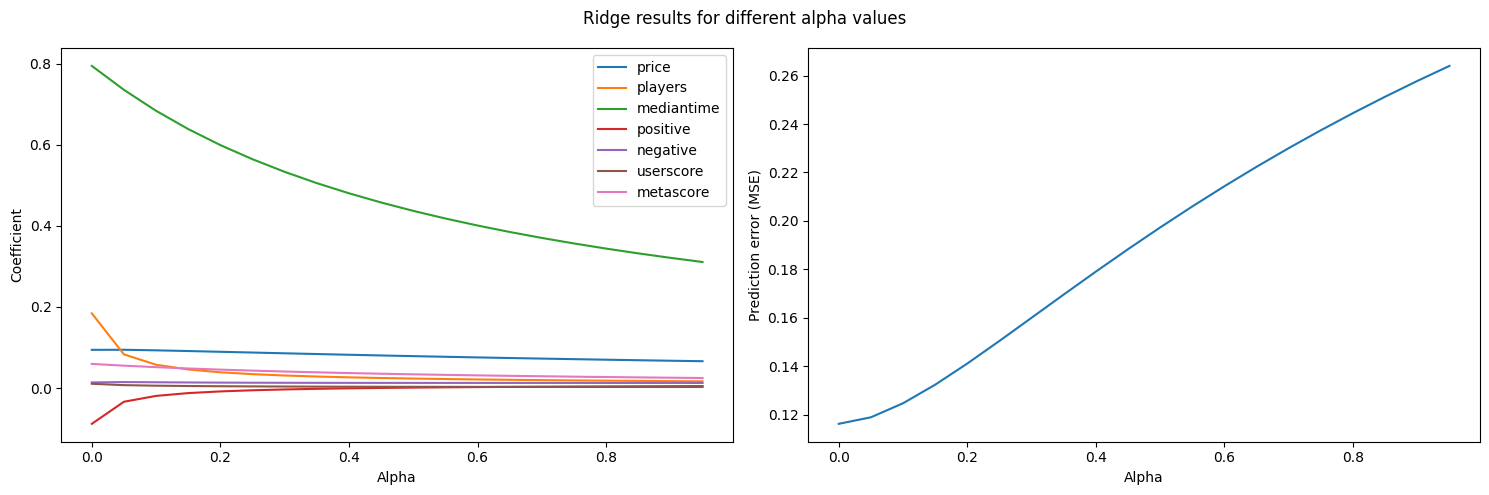

In [54]:

# plot the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
 
# loop over the independent variables and plot each one as a separate line
for var in independent_vars:
    axs[0].plot(alpha_values_df.index, alpha_values_df[var], label=var)
 
axs[0].set_xlabel('Alpha')
axs[0].set_ylabel('Coefficient')
# axs[0].set_title('Ridge regression coefficients by alpha')
axs[0].legend(loc="upper right", frameon=True)
 
# loop over the independent variables and plot each one as a separate line
axs[1].plot(alpha_values_df.index, alpha_values_df["mse_resid"])
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('Prediction error (MSE)')
 
fig.suptitle("Ridge results for different alpha values")
plt.tight_layout()
plt.show()